# PHC3

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [2]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['dkrz_eerie_disk']['dkrz_eerie_observations']

In [3]:
phc = cat['PHC3']['phc3']

We can see what is available

In [4]:
print(list(phc))

['annual', 'seasonal']


So we have annual and seasonal data, we can load them:

In [6]:
phc_annual = phc['annual'].to_dask()
phc_seasonal = phc['seasonal'].to_dask()

They become simple xarrays

In [7]:
phc_annual

<xarray.Dataset>
Dimensions:  (depth: 33, lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * depth    (depth) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    temp     (depth, lat, lon) float64 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    salt     (depth, lat, lon) float64 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        A Global Ocean Hydrography with a High Quality Arctic Ocean...
    references:   Steele, M., R. Morley, and W. Ermold (2001), PHC: A global ...
    history:      Converted to netCDF format by Joe Hamman (phc_to_nc.ipynb) ...
    source:       Polar Science Center/Applied Physics Lab/University of Wash...
    institution:  University of Washington

Lookt at annula temperaute data:

In [15]:
phc_annual.temp

<xarray.DataArray 'temp' (depth: 33, lat: 180, lon: 360)>
dask.array<open_dataset-4d8ba753e00a16c05cb1179b67b0415ftemp, shape=(33, 180, 360), dtype=float64, chunksize=(33, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * depth    (depth) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  sea_water_temperature
    units:          degrees_Celcius

Plot first depth level:

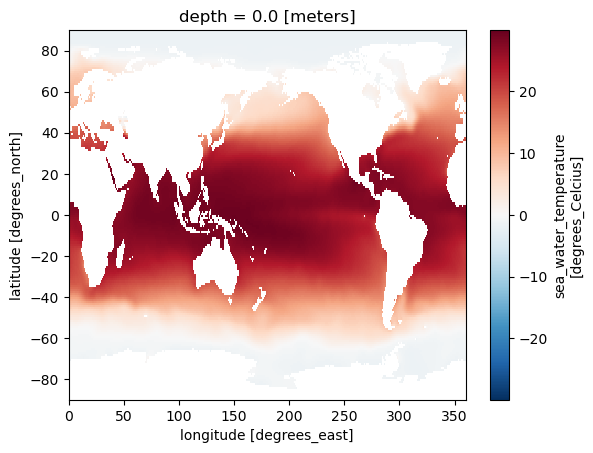

In [19]:
phc_annual.temp[0,:,:].plot()

Depths:

In [20]:
phc_annual.depth.values

array([   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,
        200.,  250.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1750., 2000., 2500.,
       3000., 3500., 4000., 4500., 5000., 5500.])